# API para obtener datos sobre contaminación sonora

## ETL

In [83]:
#!pip install requests bs4
#Esta es la URL del proyecto
#https://noiseproject.org/data-download/
#!pip install geopy

In [84]:

import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import io
from pandas.errors import EmptyDataError
import warnings

In [85]:
# Inicializamos un df para almacenar los datos
df = ''

In [86]:
# Descargamos los datos de contaminación sonora desde la fuente en línea
csv_url = 'https://citsci-noise-server.ornith.cornell.edu/noise/download/csv?lang=en'
response_csv = requests.get(csv_url)

# Verificamos si la respuesta es exitosa
if response_csv.status_code == 200:
    csv_content = io.StringIO(response_csv.text)
    df = pd.read_csv(csv_content)
else:
    print("Error al descargar los datos")

In [87]:
# Convertimos las fechas y tiempos en datetime para su uso
df['Start date/time in UTC'] = pd.to_datetime(df['Start date/time in UTC'])
df['Start date UTC'] = df['Start date/time in UTC'].dt.normalize()
df['Start time UTC'] = df['Start date/time in UTC'].dt.time

# cambiamos la especificacion America/NY solo por New York
df['Timezone'] = df['Timezone'].str.replace('America/New_York', 'New York')


In [88]:
#Seleccionamos los valores que competen solo a NY
df = df[df['Timezone'] == 'New York']

In [89]:
df

,Start date/time in UTC,Timezone,Duration (s),Observer ID,Latitude,Longitude,Mean volume (dBA),Mood,Could control noise exposure,Indoors,Emoji,Emoji descriptions,Nominated as noise refuge,Start date UTC,Start time UTC
0,2022-02-08 14:07:20,New York,29,56,42.71516,-76.40451,42,2,False,True,🗣🤣,"speaking head in silhouette,rolling on the flo...",False,2022-02-08,14:07:20
1,2022-02-08 14:56:00,New York,29,54,42.71489,-76.40509,39,1,True,True,🎶,multiple musical notes,False,2022-02-08,14:56:00
2,2022-02-08 15:46:02,New York,29,55,42.38951,-71.14181,70,3,False,False,🚗🛣,"automobile,motorway",False,2022-02-08,15:46:02
3,2022-02-09 10:17:05,New York,29,61,41.82063,-71.42895,72,1,True,True,🎶🎻🎺,"multiple musical notes,violin,trumpet",False,2022-02-09,10:17:05
4,2022-02-09 11:07:23,New York,29,64,42.47998,-76.45123,39,2,False,True,NaN,NaN,False,2022-02-09,11:07:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,2023-12-28 13:07:43,New York,29,1537,43.73419,-70.29528,63,3,False,True,NaN,NaN,False,2023-12-28,13:07:43
2087,2024-01-02 01:39:31,New York,29,242,33.88973,-84.27919,33,2,False,True,🚗,automobile,False,2024-01-02,01:39:31
2088,2024-01-03 09:43:26,New York,29,281,42.42252,-71.19009,55,2,True,True,🚇🛠🕍,"metro,hammer and wrench,synagogue",False,2024-01-03,09:43:26
2089,2024-01-03 09:44:36,New York,29,62,42.48003,-76.45111,51,2,False,True,🏢🖥,"office building,desktop computer",False,2024-01-03,09:44:36


In [90]:
#Usamos la descripcion de los emojis como indicador de qué tipo de fuente produce el ruido
df = df.rename(columns={'Emoji descriptions':'Noise_Source'})

In [91]:
# Mapeamos las emociones a nombres más comprensibles
def best_name(Mood):
    if Mood == 1:
        return "Extremely Happy"
    elif Mood == 2:
        return "Happy"
    elif Mood == 3:
        return "Neutral"
    elif Mood == 4:
        return "Somewhat Sad"
    elif Mood == 5:
        return "Very Sad"
    else:
        return "Unknown" # Para manejar valores inesperados

# Aplicamos la función de mapeo a la columna 'Mood'
df['Mood_scale'] = df['Mood'].apply(best_name)


In [92]:
df.columns

Index(['Start date/time in UTC', 'Timezone', 'Duration (s)', 'Observer ID',
       'Latitude', 'Longitude', 'Mean volume (dBA)', 'Mood',
       'Could control noise exposure', 'Indoors', 'Emoji', 'Noise_Source',
       'Nominated as noise refuge', 'Start date UTC', 'Start time UTC',
       'Mood_scale'],
      dtype='object')

In [93]:
# Obtener los valores únicos en la columna 'Noise_Source'
unique_noise_sources = df['Noise_Source'].unique()

# Mostrar los valores únicos
print(unique_noise_sources)


['speaking head in silhouette,rolling on the floor laughing'
 'multiple musical notes' 'automobile,motorway'
 'multiple musical notes,violin,trumpet' nan 'television' 'school'
 'desktop computer' 'bell,rolling on the floor laughing'
 'automobile,bird,taxi,bus,man+personal computer,office building' 'woman'
 'automobile,multiple musical notes,fountain,bird,bus,trumpet,honeybee,deciduous tree,speaking head in silhouette,rolling on the floor laughing'
 'automobile,bird,bus,wind blowing face,deciduous tree,speaking head in silhouette,rolling on the floor laughing'
 'automobile,vertical traffic light,bird,bus,wind blowing face,deciduous tree,speaking head in silhouette,rolling on the floor laughing'
 'speaking head in silhouette'
 'speaker with three sound waves,ice skate,office building,speaking head in silhouette,soccer ball'
 'pistol' 'national park' 'house with garden' 'automobile'
 'bird,airplane,honeybee'
 'hammer,automobile,bus,delivery truck,racing car'
 'television,speaking head in 

In [94]:
# Filtramos solo los registros relacionados con ruidos de automoviles o taxis
#Debemos usar de automoviles pues esos son los ubers, es la categoría más cercana
#^pues no hay categoría de Uber como tal
df = df[(df['Noise_Source'].str.contains('taxi')) | (df['Noise_Source'].str.contains('automobile'))]


In [95]:

# Ordenamos los datos por fecha y hora en orden descendente
df = df.sort_values(by='Start date/time in UTC', ascending=False).reset_index(drop=True)


In [96]:
# Mostramos el DataFrame resultante
df

,Start date/time in UTC,Timezone,Duration (s),Observer ID,Latitude,Longitude,Mean volume (dBA),Mood,Could control noise exposure,Indoors,Emoji,Noise_Source,Nominated as noise refuge,Start date UTC,Start time UTC,Mood_scale
0,2024-01-02 01:39:31,New York,29,242,33.88973,-84.27919,33,2,False,True,🚗,automobile,False,2024-01-02,01:39:31,Happy
1,2023-12-14 23:08:02,New York,29,1520,43.68096,-70.45101,57,3,False,False,🚗🔊🌳,"automobile,speaker with three sound waves,deci...",False,2023-12-14,23:08:02,Neutral
2,2023-12-08 19:28:58,New York,29,1554,43.68148,-70.44591,74,5,False,False,🚕🚗🚁🚜🚨🚑🗣🏓⛈,"taxi,automobile,helicopter,tractor,police cars...",False,2023-12-08,19:28:58,Very Sad
3,2023-11-30 10:48:57,New York,29,1511,43.68446,-70.44591,70,3,False,False,🚗🚚🚁,"automobile,delivery truck,helicopter",False,2023-11-30,10:48:57,Neutral
4,2023-11-30 10:48:48,New York,29,1521,43.68160,-70.45195,69,4,False,False,🚁🚗🐦,"helicopter,automobile,bird",False,2023-11-30,10:48:48,Somewhat Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2022-02-11 15:43:31,New York,29,62,42.47696,-76.46715,78,3,False,False,🚗🚦🐦🚌🌬🌳🗣🤣,"automobile,vertical traffic light,bird,bus,win...",False,2022-02-11,15:43:31,Neutral
77,2022-02-11 15:39:19,New York,29,62,42.47642,-76.46707,81,3,False,False,🚗🐦🚌🌬🌳🗣🤣,"automobile,bird,bus,wind blowing face,deciduou...",False,2022-02-11,15:39:19,Neutral
78,2022-02-11 13:43:37,New York,29,87,39.94971,-75.17148,68,2,False,False,🚗🎶⛲🐦🚌🎺🐝🌳🗣🤣,"automobile,multiple musical notes,fountain,bir...",True,2022-02-11,13:43:37,Happy
79,2022-02-10 15:18:48,New York,29,87,39.94969,-75.16720,53,2,False,True,🚗🐦🚕🚌👨‍💻🏢,"automobile,bird,taxi,bus,man+personal computer...",False,2022-02-10,15:18:48,Happy


In [97]:
import funciones_propias as fp

In [98]:
fp.tipos_cols(df)

,Columna,Tipo de Valor,Cantidad,Porcentaje de NaN,Más de un tipo de valor (no NaN)
0,Start date/time in UTC,<class 'pandas._libs.tslibs.timestamps.Timesta...,81,0.00%,No
1,Start date/time in UTC,NaN,0,0.00%,No
2,Timezone,<class 'str'>,81,0.00%,No
3,Timezone,NaN,0,0.00%,No
4,Duration (s),<class 'int'>,81,0.00%,No
5,Duration (s),NaN,0,0.00%,No
6,Observer ID,<class 'int'>,81,0.00%,No
7,Observer ID,NaN,0,0.00%,No
8,Latitude,<class 'float'>,81,0.00%,No
9,Latitude,NaN,0,0.00%,No


In [99]:
# 1. Eliminar columnas que no se van a utilizar
df.drop(['Emoji', 'Noise_Source', 'Mood'], axis=1, inplace=True)


In [100]:
# 2. Manejar valores faltantes en 'Nominated as noise refuge'
# Rellenar los valores NaN con False, ya que es un booleano
df['Nominated as noise refuge'] = df['Nominated as noise refuge'].fillna(False)


In [101]:
# 3. Convertir 'Start date/time in UTC' y 'Start date UTC' a datetime
df['Start date/time in UTC'] = pd.to_datetime(df['Start date/time in UTC'])
df['Start date UTC'] = pd.to_datetime(df['Start date UTC'])


In [102]:
# 4. Convertir 'Start time UTC' a formato de tiempo si es necesario

df['Start time UTC'] = pd.to_datetime(df['Start time UTC'], format='%H:%M:%S').dt.time


In [103]:
# 5. Asegurar que las columnas restantes tengan el tipo de datos adecuado
# 'Duration (s)', 'Observer ID', 'Latitude', 'Longitude', 'Mean volume (dBA)' deben ser numéricas
df['Duration (s)'] = df['Duration (s)'].astype(int)
df['Observer ID'] = df['Observer ID'].astype(int)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df['Mean volume (dBA)'] = df['Mean volume (dBA)'].astype(int)


In [104]:
# 6. Convertir los valores booleanos a tipo booleano si es necesario
df['Could control noise exposure'] = df['Could control noise exposure'].astype(bool)
df['Indoors'] = df['Indoors'].astype(bool)
df['Nominated as noise refuge'] = df['Nominated as noise refuge'].astype(bool)


In [105]:
df['timestamp'] = pd.to_datetime(df['Start date/time in UTC'])

# Obtener la hora del día como valor numérico (0-23)
df['hour_of_day'] = df['timestamp'].dt.hour

# Obtener el día del mes como valor numérico (1-31)
df['day_of_month'] = df['timestamp'].dt.day

# Obtener el mes como valor numérico (1-12)
df['month'] = df['timestamp'].dt.month

# Obtener el día de la semana como valor numérico (lunes=0, martes=1, ..., domingo=6)
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Si deseas que los días de la semana comiencen desde 1 (lunes=1, martes=2, ..., domingo=7):
df['day_of_week'] = df['timestamp'].dt.dayofweek + 1

# Muestra las primeras filas con las nuevas columnas
print(df[['timestamp', 'hour_of_day', 'day_of_month', 'month', 'day_of_week']].head())

            timestamp  hour_of_day  day_of_month  month  day_of_week
0 2024-01-02 01:39:31            1             2      1            2
1 2023-12-14 23:08:02           23            14     12            4
2 2023-12-08 19:28:58           19             8     12            5
3 2023-11-30 10:48:57           10            30     11            4
4 2023-11-30 10:48:48           10            30     11            4


In [106]:
df

,Start date/time in UTC,Timezone,Duration (s),Observer ID,Latitude,Longitude,Mean volume (dBA),Could control noise exposure,Indoors,Nominated as noise refuge,Start date UTC,Start time UTC,Mood_scale,timestamp,hour_of_day,day_of_month,month,day_of_week
0,2024-01-02 01:39:31,New York,29,242,33.88973,-84.27919,33,False,True,False,2024-01-02,01:39:31,Happy,2024-01-02 01:39:31,1,2,1,2
1,2023-12-14 23:08:02,New York,29,1520,43.68096,-70.45101,57,False,False,False,2023-12-14,23:08:02,Neutral,2023-12-14 23:08:02,23,14,12,4
2,2023-12-08 19:28:58,New York,29,1554,43.68148,-70.44591,74,False,False,False,2023-12-08,19:28:58,Very Sad,2023-12-08 19:28:58,19,8,12,5
3,2023-11-30 10:48:57,New York,29,1511,43.68446,-70.44591,70,False,False,False,2023-11-30,10:48:57,Neutral,2023-11-30 10:48:57,10,30,11,4
4,2023-11-30 10:48:48,New York,29,1521,43.68160,-70.45195,69,False,False,False,2023-11-30,10:48:48,Somewhat Sad,2023-11-30 10:48:48,10,30,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2022-02-11 15:43:31,New York,29,62,42.47696,-76.46715,78,False,False,False,2022-02-11,15:43:31,Neutral,2022-02-11 15:43:31,15,11,2,5
77,2022-02-11 15:39:19,New York,29,62,42.47642,-76.46707,81,False,False,False,2022-02-11,15:39:19,Neutral,2022-02-11 15:39:19,15,11,2,5
78,2022-02-11 13:43:37,New York,29,87,39.94971,-75.17148,68,False,False,True,2022-02-11,13:43:37,Happy,2022-02-11 13:43:37,13,11,2,5
79,2022-02-10 15:18:48,New York,29,87,39.94969,-75.16720,53,False,True,False,2022-02-10,15:18:48,Happy,2022-02-10 15:18:48,15,10,2,4


In [107]:
df.to_csv('arima.csv', index=False)

## EDA

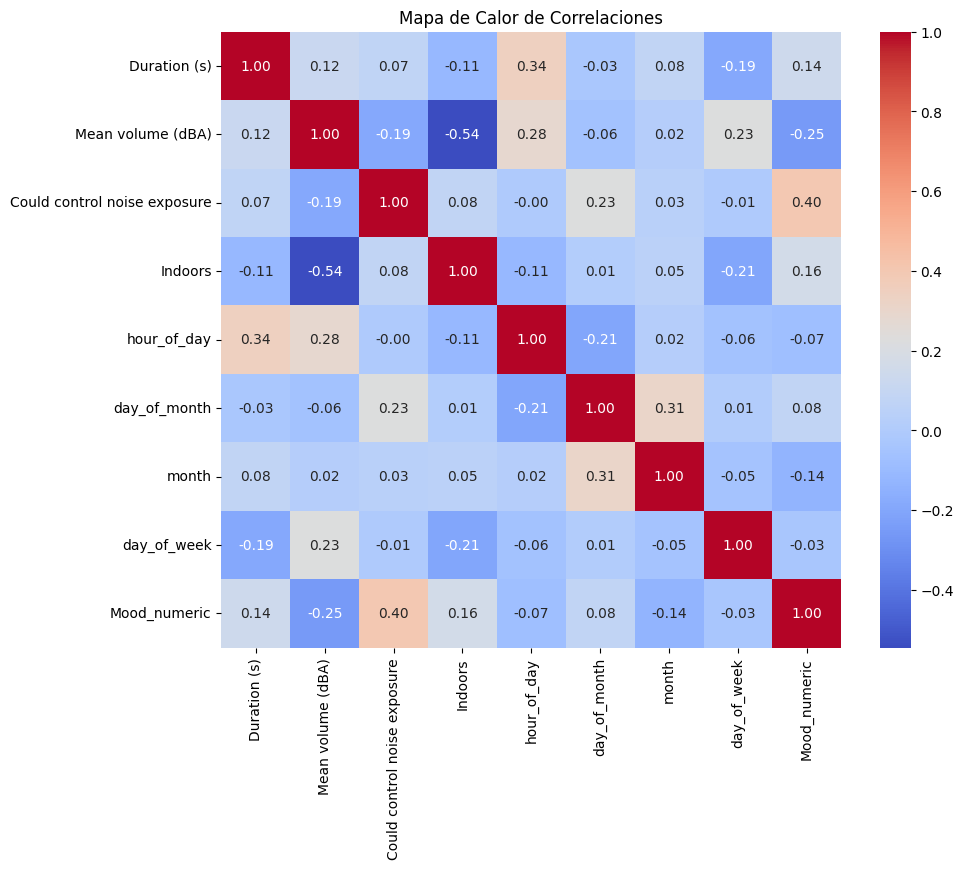

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame auxiliar para la conversión
aux_df = df.copy()

# Función de mapeo de Mood_scale a valores numéricos
def map_mood_to_numeric(mood):
    if mood == "Very Sad":
        return 0
    elif mood == "Somewhat Sad":
        return 1
    elif mood == "Neutral":
        return 2
    elif mood == "Happy":
        return 3
    elif mood == "Extremely Happy":
        return 4
    else:
        return -1  # Valor predeterminado para valores inesperados

# Aplicar la función de mapeo a la columna 'Mood_scale' en el DataFrame auxiliar
aux_df['Mood_numeric'] = aux_df['Mood_scale'].apply(map_mood_to_numeric)

# Seleccionar las columnas de interés en el DataFrame auxiliar
selected_columns = ['Duration (s)', 'Mean volume (dBA)', 'Could control noise exposure', 'Indoors', 'hour_of_day', 'day_of_month', 'month', 'day_of_week', 'Mood_numeric']

# Crear un DataFrame con las columnas seleccionadas del DataFrame auxiliar
selected_df = aux_df[selected_columns]

# Calcular la matriz de correlación en el DataFrame seleccionado
correlation_matrix = selected_df.corr()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


## Modelos

In [109]:
print("Rango de valores de la columna 'timestamp':")
print(df['timestamp'].min())
print(df['timestamp'].max())


Rango de valores de la columna 'timestamp':
2022-02-08 15:46:02
2024-01-02 01:39:31


In [110]:
### Arima (pronostica valores de ruido para n periodos)

In [111]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# Nos asegurarnos de que los datos están ordenados por fecha y hora.
df.sort_values(by='timestamp', inplace=True)

# 'Mean volume (dBA)' es nuestra variable de interés, en función de ella creamos una serie temporal.
ts = df.set_index('timestamp')['Mean volume (dBA)']

# Verificamos la estacionariedad con el test de Dickey-Fuller aumentado.
result = adfuller(ts.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -4.741662865216627
p-value: 7.022667314955419e-05


el p valor es muy bajo, es estacionaria. En lo que viene ya podemos ajustar un modelo, eliminamos el valor de 2024 enero  pues aun no ha terminado el mes y debemos agrupar por mes porque las obs están muy espaciadas

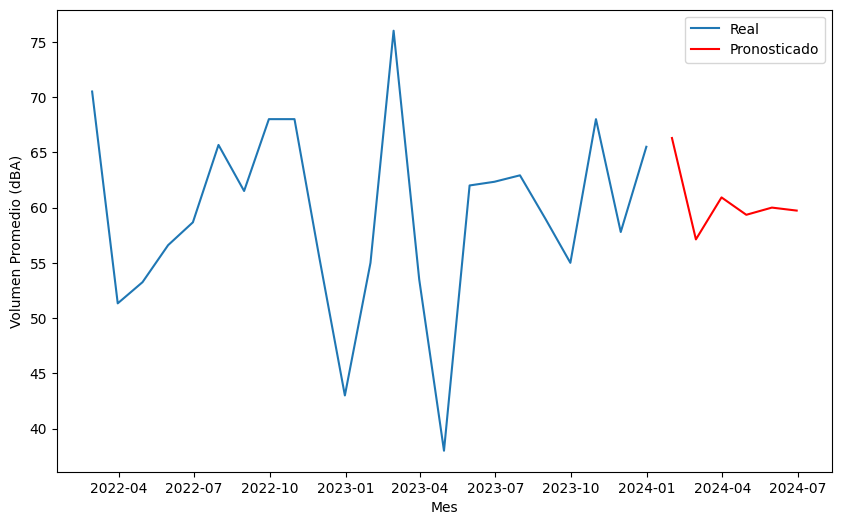

2024-01-31    66.292952
2024-02-29    57.119339
2024-03-31    60.918819
2024-04-30    59.345170
2024-05-31    59.996936
2024-06-30    59.726991
Freq: M, Name: predicted_mean, dtype: float64


In [112]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Paso 2: Cargar el conjunto de datos
df_path = 'arima.csv'
df = pd.read_csv(df_path)


# Convertir la columna 'timestamp' a datetime y establecerla como el índice
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Agregar los datos por mes y calcular la media de 'Mean volume (dBA)', excluyendo enero de 2024
monthly_ts = df['Mean volume (dBA)'].resample('M').mean()
monthly_ts = monthly_ts[monthly_ts.index < '2024-01-01']

# Crear un nuevo rango de fechas para los datos mensuales que cubra el período hasta diciembre de 2023
new_date_range = pd.date_range(start=monthly_ts.index[0], end=monthly_ts.index[-1], freq='M')

# Reindexar la serie temporal mensual con el nuevo rango de fechas
monthly_ts_reindexed = monthly_ts.reindex(new_date_range).interpolate()
monthly_ts_reindexed.index.freq = 'M'

# Ajustar un modelo ARIMA en los datos mensuales con el rango de fechas reindexado
modelo = ARIMA(monthly_ts_reindexed, order=(1, 0, 1))
modelo_ajustado = modelo.fit()

# Generar pronósticos para los próximos 5 meses a partir de diciembre de 2023
n_pasos = 6
pronostico = modelo_ajustado.get_forecast(steps=n_pasos)
valores_pronosticados = pronostico.predicted_mean
serie_pronosticada = pd.Series(valores_pronosticados, index=pronostico.row_labels)

# Visualizar los pronósticos junto con los datos mensuales originales hasta diciembre de 2023
plt.figure(figsize=(10, 6))
plt.plot(monthly_ts_reindexed, label='Real')
plt.plot(serie_pronosticada, label='Pronosticado', color='red')
plt.xlabel('Mes')
plt.ylabel('Volumen Promedio (dBA)')
plt.legend()
plt.show()

# Imprimir los valores pronosticados
print(serie_pronosticada)

Para evaluar la calidad de un modelo ARIMA, podemos utilizar varios enfoques y métricas. Algunos de los más comunes incluyen:

Análisis de los residuos: Buscamos residuos (errores de predicción) que sean blancos, es decir, que se distribuyan normalmente alrededor de cero y no estén autocorrelacionados.
Criterios de información: Tales como el AIC (Criterio de Información de Akaike) y el BIC (Criterio de Información Bayesiano), donde valores más bajos indican un mejor ajuste del modelo.
Errores de pronóstico: Métricas como el MAE (Error Absoluto Medio), el MSE (Error Cuadrático Medio) y el RMSE (Raíz del Error Cuadrático Medio) son comunes para evaluar la precisión de las predicciones del modelo.

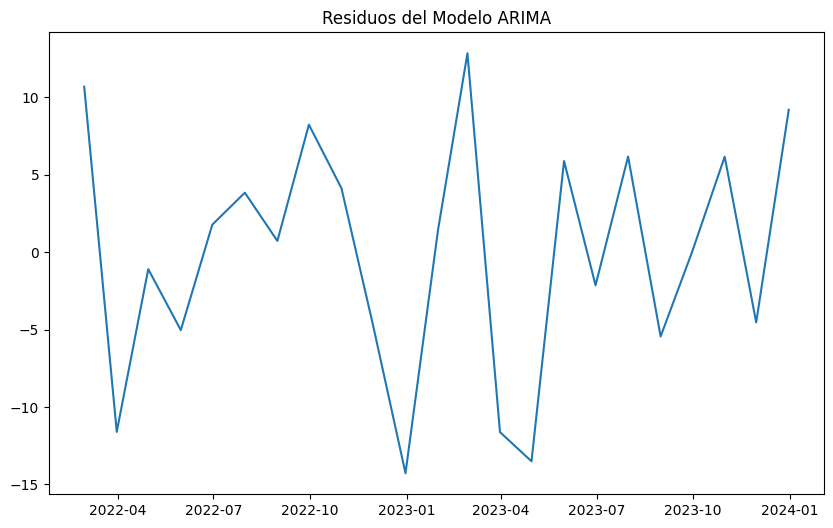

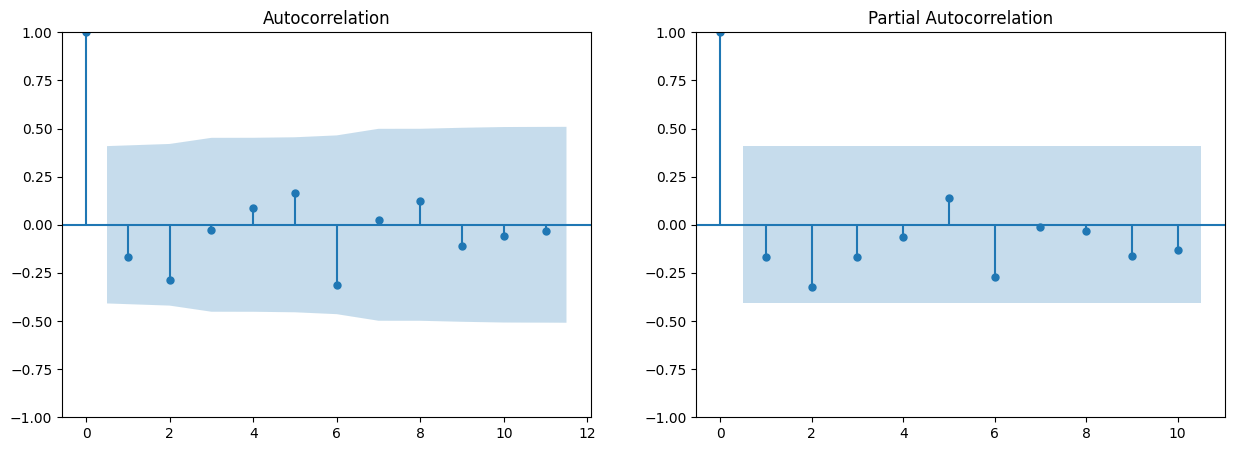

AIC: 166.66160041117564
BIC: 171.20357727489224
Estadístico de prueba de normalidad: 1.196030921315538, p-value: 0.5499018558114799
Error Absoluto Medio (MAE): 6.311232422775751
Error Cuadrático Medio (MSE): 58.27835441379559
Raíz del Error Cuadrático Medio (RMSE): 7.634026094649899


In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import normaltest
import matplotlib.pyplot as plt

# Extraer los residuos del modelo ajustado
residuals = modelo_ajustado.resid

# Realizar un test de normalidad en los residuos
stat, p = normaltest(residuals)

# Calcular métricas de error
mae = np.mean(np.abs(residuals))
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

# Visualización de los residuos y sus ACF y PACF
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuos del Modelo ARIMA')
plt.show()

# Limitar los retrasos a la mitad del tamaño de la muestra para la trama PACF.
lags_pacf = len(residuals) // 2 - 1

# Trama ACF y PACF de los residuos con el número correcto de retrasos
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1], lags=lags_pacf)
plt.show()

# Mostrar el AIC y el BIC del modelo ajustado
print(f"AIC: {modelo_ajustado.aic}")
print(f"BIC: {modelo_ajustado.bic}")

# Mostrar los resultados del test de normalidad
print(f"Estadístico de prueba de normalidad: {stat}, p-value: {p}")

# Mostrar las métricas de error
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")


#### Criterios de Información (AIC y BIC):

- **AIC (Criterio de Información de Akaike)**: 166.66
- **BIC (Criterio de Información Bayesiano)**: 171.20

Estos valores son útiles para comparar modelos: modelos con valores más bajos de AIC y BIC son preferibles. Aunque estos valores no nos dicen nada por sí solos (ya que son útiles en comparaciones), su magnitud sugiere que el modelo podría estar bien ajustado. Sin embargo, sin modelos alternativos para comparar, no podemos hacer una afirmación definitiva solo con estos números.

#### Test de Normalidad:

- **Estadístico de Prueba**: 1.20
- **Valor p**: 0.55

Este test comprueba si los residuos (errores de predicción del modelo) siguen una distribución normal. Un valor p superior a 0.05, como en este caso, sugiere que los residuos siguen una distribución normal, lo cual es un buen indicador, ya que muchos modelos asumen que los errores están normalmente distribuidos.

#### Métricas de Error:

- **MAE (Error Absoluto Medio)**: 6.31
- **MSE (Error Cuadrático Medio)**: 58.28
- **RMSE (Raíz del Error Cuadrático Medio)**: 7.63

Estas métricas evalúan el rendimiento del modelo en términos de cuán cerca están las predicciones de los valores reales. Un MAE, MSE y RMSE más bajos indican que el modelo tiene un mejor rendimiento en la reducción de errores y es más preciso en sus predicciones.

#### Gráfico de Residuos:

La gráfica muestra los residuos, es decir, las diferencias entre los valores observados y los valores predichos por el modelo, a lo largo del tiempo. Los residuos no muestran patrones claros o tendencias sistemáticas, lo cual es un buen indicio de que el modelo está capturando adecuadamente la información de la serie temporal.

#### Gráfico de Autocorrelación (ACF):

La autocorrelación describe cómo los datos en una serie temporal están correlacionados con ellos mismos en diferentes intervalos de tiempo. La mayoría de los puntos caen dentro del área sombreada, lo que indica que no hay autocorrelaciones significativas a distintos retrasos y que los residuos se comportan como ruido blanco.

#### Gráfico de Autocorrelación Parcial (PACF):

Similar al ACF, el PACF mide la correlación parcial entre los datos y su versión rezagada, controlando por otros retrasos. El gráfico de PACF muestra que casi todas las autocorrelaciones parciales son insignificantes, lo cual es consistente con un modelo que ha capturado bien la dinámica de la serie temporal.

Los gráficos ACF y PACF respaldan la conclusión de que los residuos se comportan como ruido blanco, significando que el modelo ARIMA está funcionando adecuadamente. Además, la prueba de normalidad con un valor p de 0.55 confirma que los residuos se distribuyen de manera normal, apoyando aún más la validez del modelo.

Las métricas de error indican que el modelo tiene un buen ajuste a los datos históricos y que las predicciones futuras hechas por este modelo se basan en un entendimiento sólido de los patrones históricos.
